Project pt.1 / Samuele / width and lenght distribution

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
#load data

--2025-02-12 09:17:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘magic04.data.13’

magic04.data.13         [       <=>          ]   1.41M   170KB/s    in 13s     

2025-02-12 09:17:45 (112 KB/s) - ‘magic04.data.13’ saved [1477391]



In [2]:
!cat /home/samu/LaboratoryOfComputationalPhysics_Y7/Project/magic04.data  ## show data

cat: /home/samu/LaboratoryOfComputationalPhysics_Y7/Project/magic04.data: No such file or directory


In [3]:
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd


In [7]:
#file_name="/home/samu/LaboratoryOfComputationalPhysics_Y7/Project/magic04.data"
file_name="magic04.data.7"
data = pd.DataFrame(pd.read_csv(file_name))
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']
data   
#### save data in a DataFrame


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


# punto 1 (Luca)
Study the features of the datasets and compare them for signal and background events

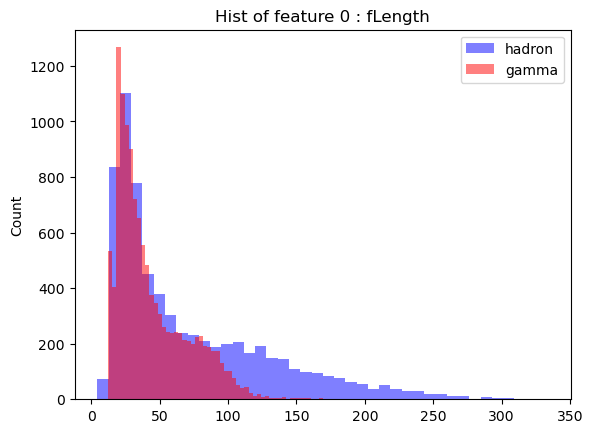

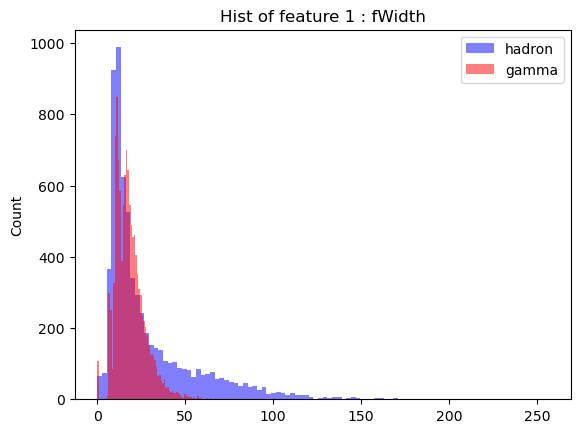

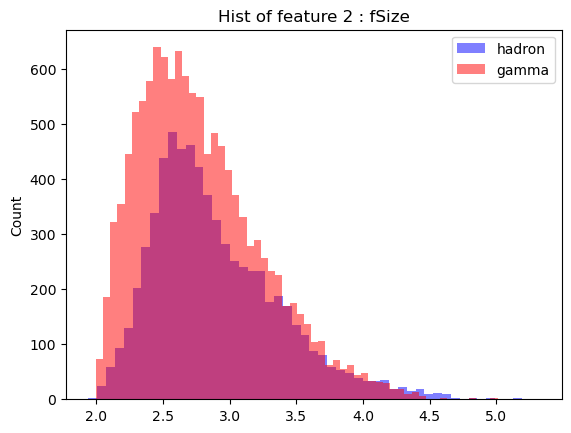

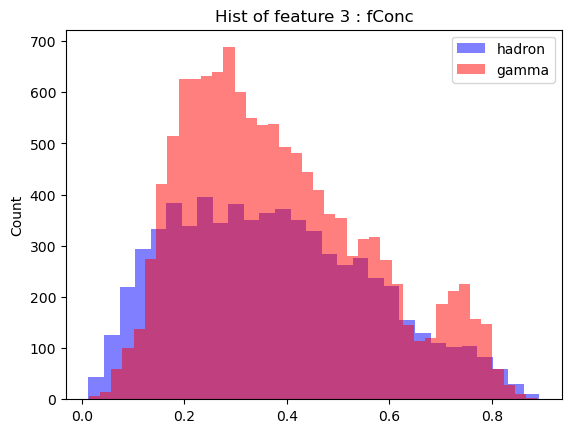

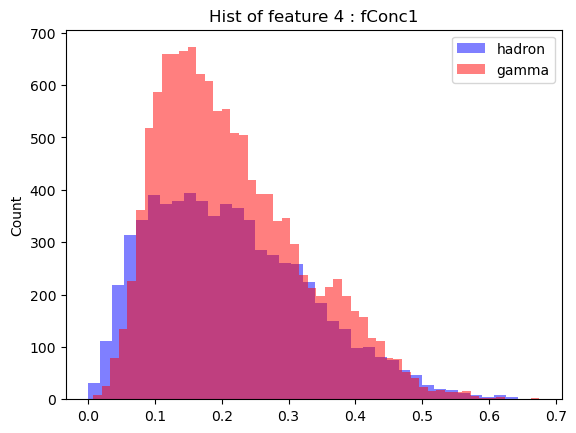

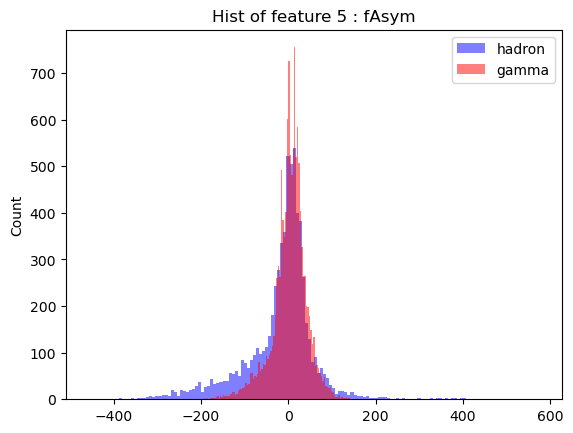

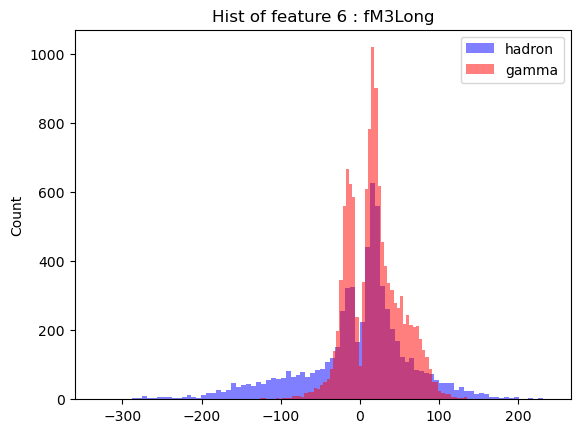

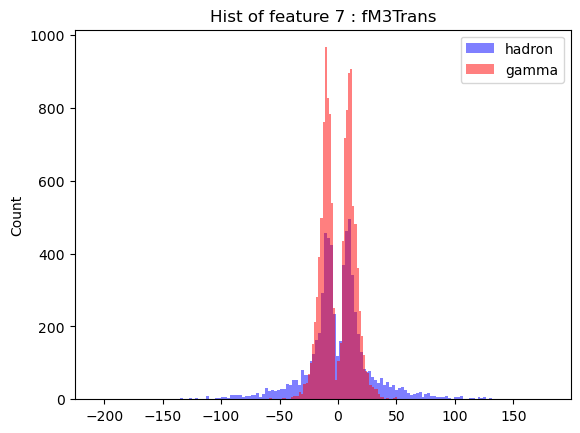

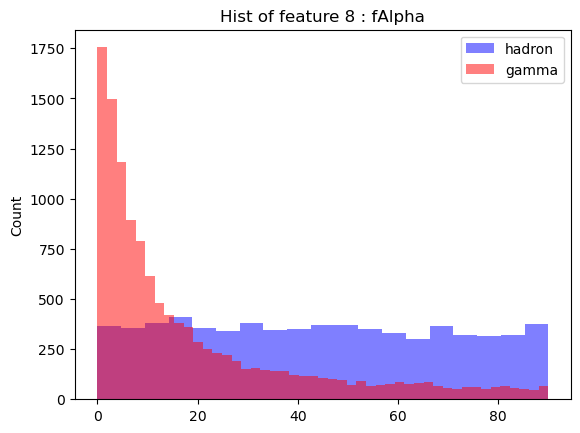

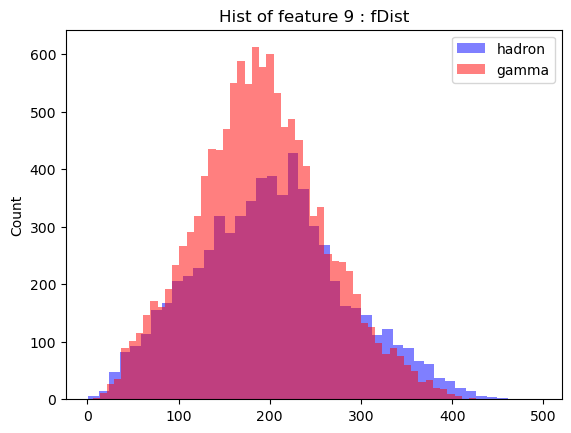

In [8]:
# making directory for saving plots
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # Shows all outputs of code cells


dir_name = 'punto_1_plots'

if not os.path.exists(dir_name):
    os.makedirs(dir_name)


# X contains features, Y contains categories
X = data.loc[:,'fLength':'fDist']
Y = data.loc[:,'category']


for i in range(X.shape[1]):
    x_g = []
    x_h = []
    X_temp = X[str(X.columns[i])]
    for j in range(X.shape[0]):
        if (Y[j] == 'g'):
            x_g.append(X_temp[j])
        if (Y[j] == 'h'):
            x_h.append(X_temp[j])
    
    titolo = 'Hist of feature ' + str(i) + ' : ' + X.columns[i]
    img_name = 'hist_'+str(i)+'_'+X.columns[i]+'.png'
    
    ax = sns.histplot(x_h,label='hadron',alpha=0.5,color='blue', edgecolor='none')
    ax2 = sns.histplot(x_g,label='gamma',alpha=0.5,color='red', edgecolor='none')
    t = plt.title(titolo)
    lgnd = plt.legend()
    plt.savefig(os.path.join(dir_name, img_name))  # Save the plot

    plt.show()
    

    
# plot are saved in a folder named 'punto_1_plots'

# punto 2 (Luca)
Study the correlations among the features of the datasets for signal and background events

Rescaling features to average = 0 and std = 1

In [9]:
X_rescaled = X
for i in range(X.shape[1]):
    h = X[str(X.columns[i])]
    avg = np.average(h)
    std = np.std(h)
    h = h - avg
    h = h / std
    X_rescaled[str(X_rescaled.columns[i])] = h
    


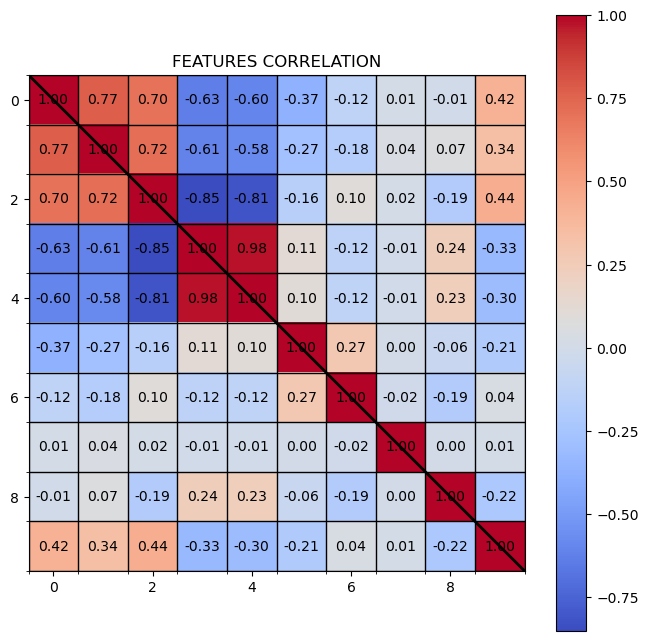

In [10]:
# too much memory is needed to compute np.cov(X,X)
# we're going to do this label by label

cov = np.zeros((X_rescaled.shape[1],X_rescaled.shape[1]))
for i in range(X_rescaled.shape[1]):
    h = X_rescaled[str(X_rescaled.columns[i])]
    for j in range(X_rescaled.shape[1]):
        v = X_rescaled[str(X_rescaled.columns[j])]
        cov[i,j] = (np.cov(h,v)[0,1])
            
ticks = np.arange(0,10,1)
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(cov, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)
ax.set_xticks(np.arange(-0.5, cov.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, cov.shape[0], 1), minor=True)
ax.grid(which='minor', color='black', linewidth=1)

for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
        ax.text(j, i, f'{cov[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10) # adds covariance text to each grid
ax.plot([-0.5, cov.shape[1]-0.5], [-0.5, cov.shape[0]-0.5], color='black', linewidth=2, linestyle='-')
plt.title('FEATURES CORRELATION')
#for i in range(cov.shape[0]):
#    for j in range(cov.shape[1]):
#        plt.text(j, i, f'{cov[i, j]:.2f}', ha='center', va='center', color='white', fontsize=8)
plt.show();

In [11]:
print('correlation of f0 and f1:',cov[0,1])
print('correlation of f0 and f2:',cov[0,2])
print('correlation of f3 and f4:',cov[3,4])
print('correlation of f2 and f3:',cov[2,3])
print('correlation of f2 and f4:',cov[2,4])

correlation of f0 and f1: 0.7705513795510602
correlation of f0 and f2: 0.7024879620910527
correlation of f3 and f4: 0.9764643541477542
correlation of f2 and f3: -0.8508966163126169
correlation of f2 and f4: -0.8088840867977037


Looks like we have good correlation between
- features 0-1
- features 0-2
- features 3-4

And good anti-correlation between
- features 2-3
- features 2-4

In [12]:
Xg_rescaled = X_rescaled[Y == 'g']
Xh_rescaled = X_rescaled[Y == 'h']

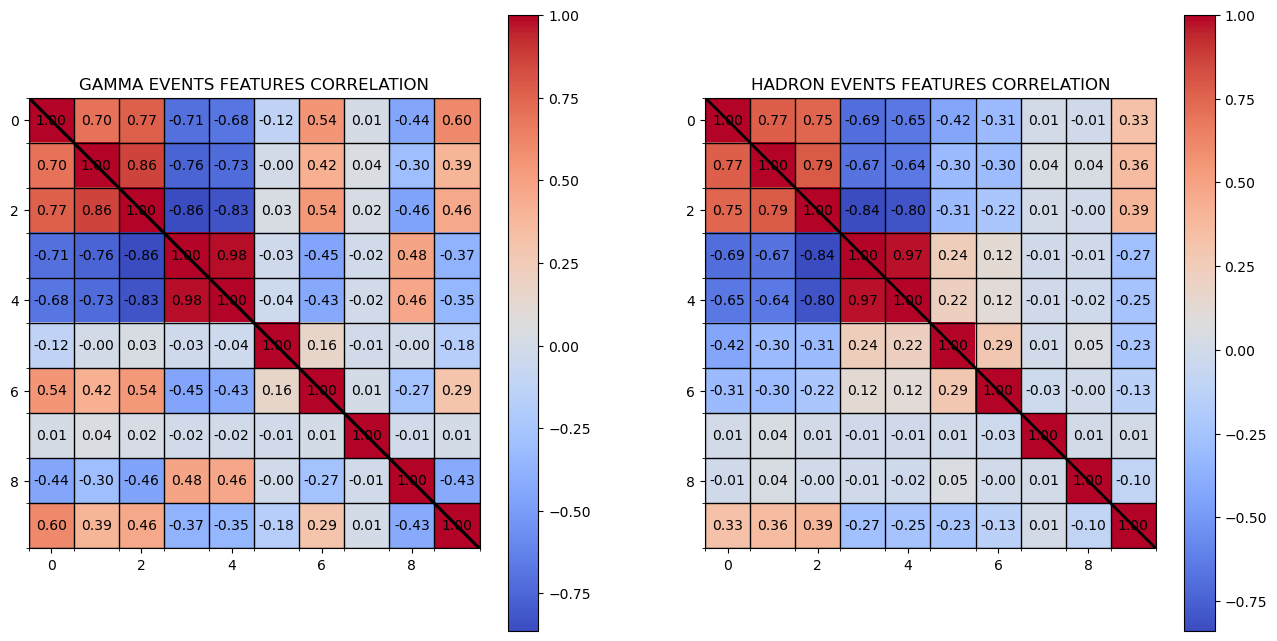

In [13]:
# too much memory is needed to compute np.cov(X,X)
# we're going to do this label by label

cov = np.zeros((Xg_rescaled.shape[1],Xg_rescaled.shape[1]))
for i in range(Xg_rescaled.shape[1]):
    h = Xg_rescaled[str(Xg_rescaled.columns[i])]
    for j in range(Xg_rescaled.shape[1]):
        v = Xg_rescaled[str(Xg_rescaled.columns[j])]
        cov[i,j] = (np.cov(h,v)[0,1])
        
std_devs = np.std(Xg_rescaled, axis=0)
cov = cov / np.outer(std_devs, std_devs) # the data for gamma events are not normalized with respsect to themselv   

ticks = np.arange(0,10,1)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
cax = ax[0].imshow(cov, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)
ax[0].set_xticks(np.arange(-0.5, cov.shape[1], 1), minor=True)
ax[0].set_yticks(np.arange(-0.5, cov.shape[0], 1), minor=True)
ax[0].grid(which='minor', color='black', linewidth=1)

for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
        ax[0].text(j, i, f'{cov[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10)

ax[0].plot([-0.5, cov.shape[1]-0.5], [-0.5, cov.shape[0]-0.5], color='black', linewidth=2, linestyle='-')
ax[0].plot([-0.5, cov.shape[1]-0.5], [-0.5, cov.shape[0]-0.5], color='black', linewidth=2, linestyle='-')
ax[0].set_title('GAMMA EVENTS FEATURES CORRELATION')

cov = np.zeros((Xh_rescaled.shape[1],Xh_rescaled.shape[1]))
for i in range(Xh_rescaled.shape[1]):
    h = Xh_rescaled[str(Xh_rescaled.columns[i])]
    for j in range(Xh_rescaled.shape[1]):
        v = Xh_rescaled[str(Xh_rescaled.columns[j])]
        cov[i,j] = (np.cov(h,v)[0,1])
        
std_devs = np.std(Xh_rescaled, axis=0)
cov = cov / np.outer(std_devs, std_devs)

cax = ax[1].imshow(cov, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)
ax[1].set_xticks(np.arange(-0.5, cov.shape[1], 1), minor=True)
ax[1].set_yticks(np.arange(-0.5, cov.shape[0], 1), minor=True)
ax[1].grid(which='minor', color='black', linewidth=1)

for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
        ax[1].text(j, i, f'{cov[i, j]:.2f}', ha='center', va='center', color='black', fontsize=10)

ax[1].plot([-0.5, cov.shape[1]-0.5], [-0.5, cov.shape[0]-0.5], color='black', linewidth=2, linestyle='-')
ax[1].set_title('HADRON EVENTS FEATURES CORRELATION')

plt.show();
#for i in range(cov.shape[0]):
#    for j in range(cov.shape[1]):
#        plt.text(j, i, f'{cov[i, j]:.2f}', ha='center', va='center', color='white', fontsize=8)

# punto 3 (Samu)

Compute the "mean-scaled-width" and the "mean-scale-length", i.e. rescale by means of their mean and standard deviation the "Width" and "Length" distributions. Compare them for signal and background events in the cases of little or a lot of light ("fSize")

In [14]:
## save the two columns I care about
## I may not need this if I use only dataframe and pandas
#length = np.array(data.fLength)
#print('lenght=', length)
#width = np.array(data.fWidth)
#print('width=',width)

## find mean and std
##print(data.describe()) ##useful as a comparison, gives you general values of the dataset, also mean and std
mu_l=data['fLength'].mean()
std_l=data['fLength'].std()
mu_w=data['fWidth'].mean()
std_w=data['fWidth'].std()
print('Length attribute:   mean = ', mu_l, '    std = ', std_l)
print('Width attribute:    mean = ', mu_w, '   std = ', std_w)


Length attribute:   mean =  53.25143966559756     std =  42.3655976356796
Width attribute:    mean =  22.181291098375308    std =  18.34648391015197


    scaled_fLength  scaled_fWidth   fLength    fWidth
0        -0.510977      -0.570016   31.6036   11.7235
1         2.568135       6.205533  162.0520  136.0310
2        -0.694767      -0.687243   23.8172    9.5728
3         0.516569       0.476342   75.1362   30.9205
4        -0.038414      -0.056201   51.6240   21.1502
5        -0.118130      -0.262982   48.2468   17.3565
6        -0.624604      -0.459041   26.7897   13.7595
7         1.014532       1.326424   96.2327   46.5165
8        -0.153179      -0.380563   46.7619   15.1993
9         0.224832       0.421286   62.7766   29.9104
10       -0.811867      -0.311847   18.8562   16.4600
11       -0.179847       0.028818   45.6321   22.7100
12       -0.473725      -0.529572   33.1818   12.4655
13        0.170104       0.595472   60.4580   33.1061
14       -0.561242       0.015088   29.4741   22.4581
15       -0.403095      -0.244995   36.1741   17.6865
16       -0.164283      -0.335132   46.2915   16.0328
17       -0.169775      -0.1

<Figure size 800x600 with 0 Axes>

<AxesSubplot: xlabel='scaled_fLength', ylabel='Count'>

<AxesSubplot: xlabel='scaled_fLength', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fLength for All Gamma Events')

Text(0.5, 0, 'Scaled fLength')

Text(0, 0.5, 'Density')

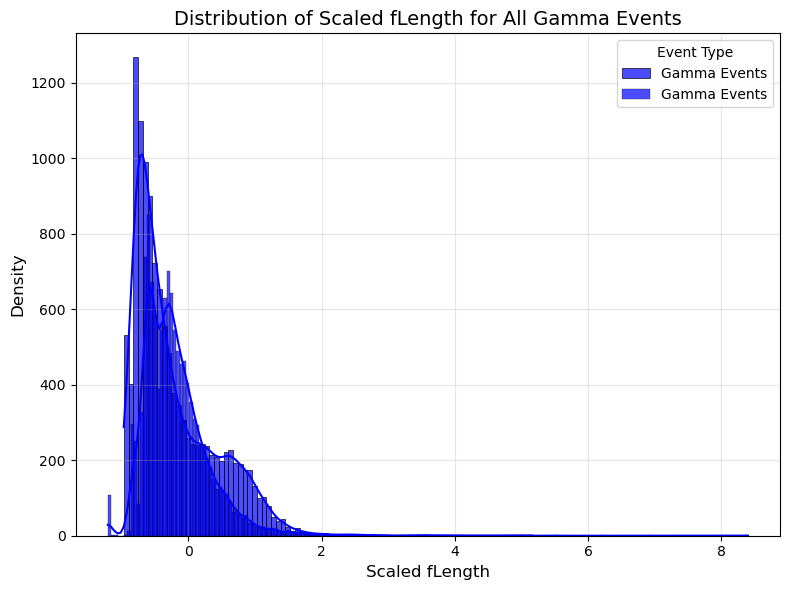

In [15]:
#### ATTENZIONE RUNNARE TUTTO ASSICURARSI CHE SIA FATTO BENE IL DATAFRAME E MU E STD CHE SE NO SI SFANCULA TUTTO

#print(data['fLength'].head(30))
data['scaled_fLength']= (data['fLength']-mu_l)/std_l   ##add a scaled comlumn to the DataFrame
data['scaled_fWidth']= (data['fWidth']-mu_w)/std_w  
print(data[['scaled_fLength','scaled_fWidth','fLength','fWidth']].head(30))
#print(data['scaled_fLength'].mean())
#print(data['scaled_fLength'].std())


## Plot the distribution for scaled fLength (all gamma events)
plt.figure(figsize=(8, 6))
sns.histplot(data[data['category'] == 'g']['scaled_fLength'], kde=True, color='blue', label='Gamma Events', alpha=0.7)
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'], kde=True, color='blue', label='Gamma Events', alpha=0.7)


## Add titles and labels
plt.title("Distribution of Scaled fLength for All Gamma Events", fontsize=14)
plt.xlabel("Scaled fLength", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Event Type", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Show the plot
plt.show()



<AxesSubplot: xlabel='scaled_fLength', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fLength for Gamma Events')

Text(0.5, 0, 'Scaled fLength')

Text(0, 0.5, 'Density')

<AxesSubplot: xlabel='scaled_fWidth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fWidth for Gamma Events')

Text(0.5, 0, 'Scaled fWidth')

Text(0, 0.5, 'Density')

<AxesSubplot: xlabel='scaled_fLength', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fLength for Hadron Events')

Text(0.5, 0, 'Scaled fLength')

Text(0, 0.5, 'Density')

<AxesSubplot: xlabel='scaled_fWidth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fWidth for Hadron Events')

Text(0.5, 0, 'Scaled fWidth')

Text(0, 0.5, 'Density')

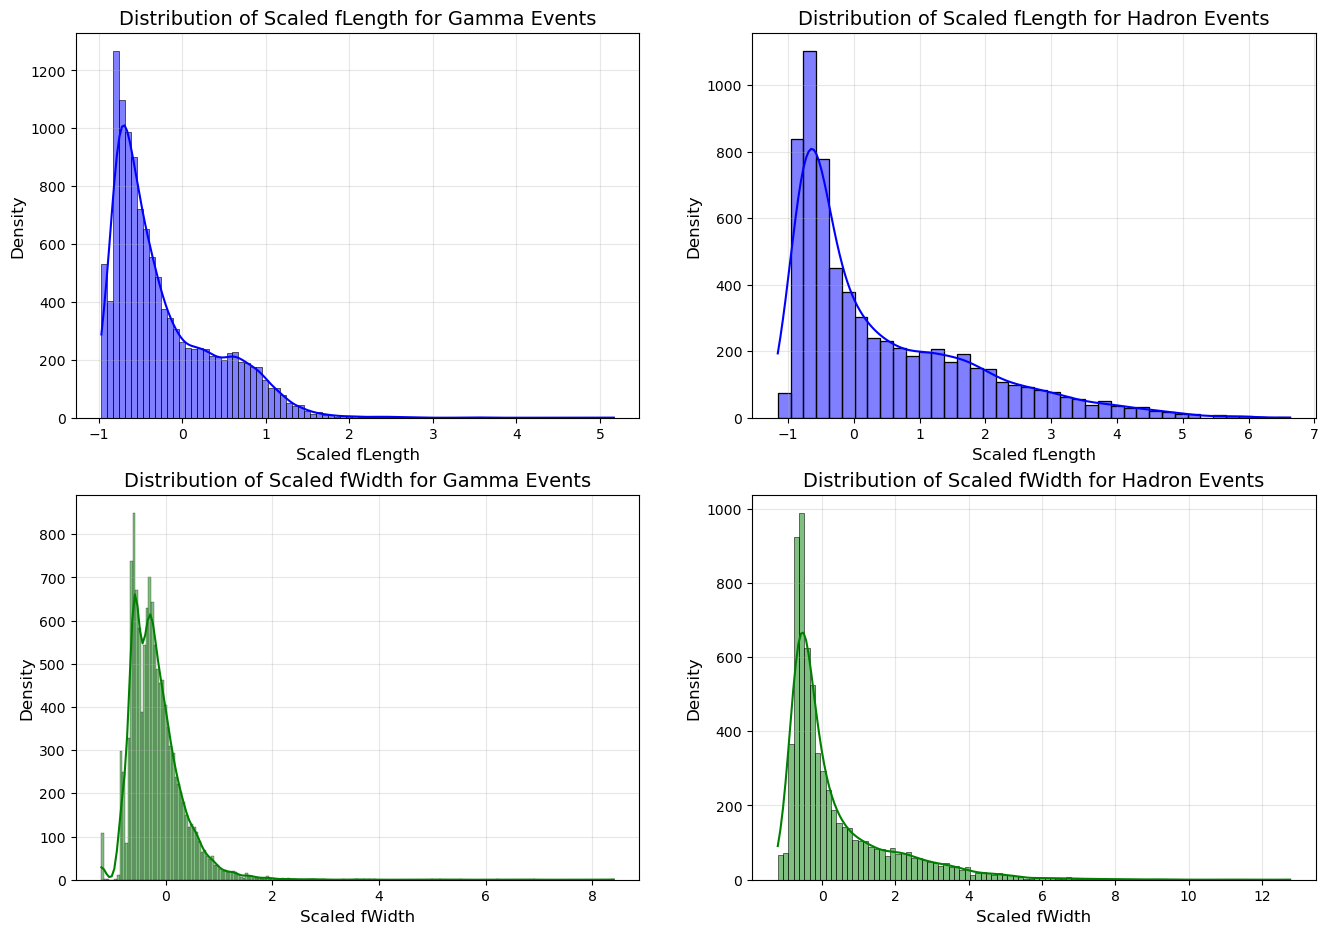

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'], kde=True, color='blue', ax=axes[0][0])
axes[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
axes[0][0].set_xlabel("Scaled fLength", fontsize=12)
axes[0][0].set_ylabel("Density", fontsize=12)
axes[0][0].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'], kde=True, color='green', ax=axes[1][0])
axes[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
axes[1][0].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][0].set_ylabel("Density", fontsize=12)
axes[1][0].grid(True, alpha=0.3)

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'], kde=True, color='blue', ax=axes[0][1])
axes[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
axes[0][1].set_xlabel("Scaled fLength", fontsize=12)
axes[0][1].set_ylabel("Density", fontsize=12)
axes[0][1].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'], kde=True, color='green', ax=axes[1][1])
axes[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
axes[1][1].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][1].set_ylabel("Density", fontsize=12)
axes[1][1].grid(True, alpha=0.3)

In [18]:
#fig, axes = plt.subplots(1, 2, figsize=(15, 6))
#sns.histplot(data['fSize'], kde=True, color='blue', label='Low Light', alpha=0.7, ax=axes[0])
#sns.histplot(10**data['fSize'], kde=True, color='blue', label='Low Light', alpha=0.7,ax=axes[1])
#plt.show()

median_fSize = data['fSize'].median()
min_fSize = data['fSize'].min()
max_fSize = data['fSize'].max()
print("data for fSize: median= ",median_fSize, 'min= ', min_fSize, 'max= ', max_fSize)
#### I don't know if I should differentiate between median of h and g I don't think so because the light quantity 
#### should be independent from the nature of the phenomenon
##as a threshold I don't know if need to use a median or maybe just the half


data for fSize: median=  2.7396 min=  1.9413 max=  5.3233


<AxesSubplot: xlabel='scaled_fLength', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fLength for Gamma Events')

Text(0.5, 0, 'Scaled fLength')

Text(0, 0.5, 'Density')

<AxesSubplot: xlabel='scaled_fWidth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fWidth for Gamma Events')

Text(0.5, 0, 'Scaled fWidth')

Text(0, 0.5, 'Density')

<AxesSubplot: xlabel='scaled_fLength', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fLength for Hadron Events')

Text(0.5, 0, 'Scaled fLength')

Text(0, 0.5, 'Density')

<AxesSubplot: xlabel='scaled_fWidth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fWidth for Hadron Events')

Text(0.5, 0, 'Scaled fWidth')

Text(0, 0.5, 'Density')

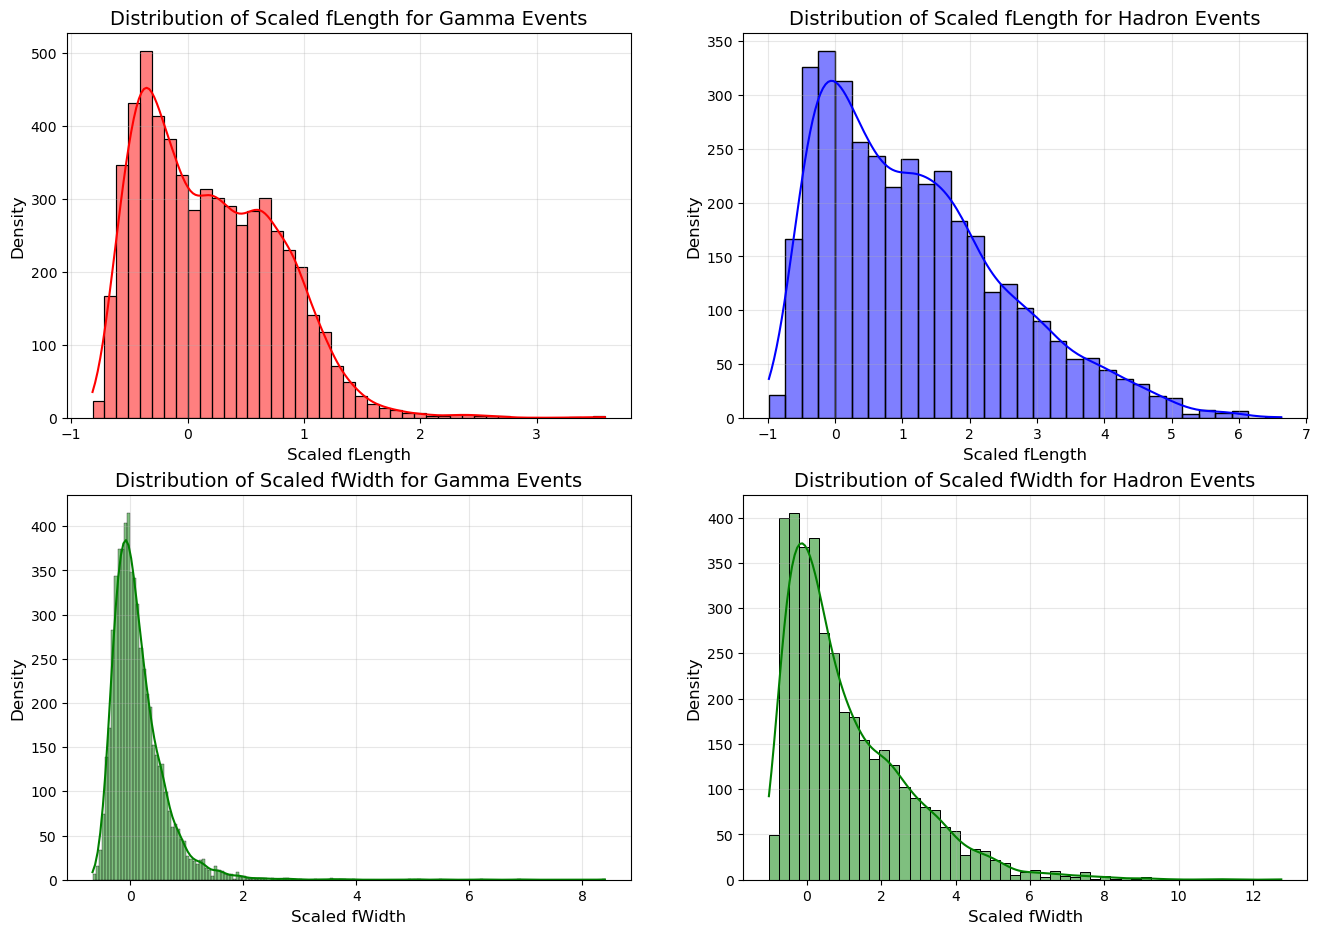

In [19]:
## suppose I use the median

#high_light=data[data['fSize']>median_fSize]
#print(high_light[])

### HIGH LIGHT  ############

fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] >= median_fSize], kde=True, color='red', ax=axes[0][0])
axes[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
axes[0][0].set_xlabel("Scaled fLength", fontsize=12)
axes[0][0].set_ylabel("Density", fontsize=12)
axes[0][0].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] >= median_fSize], kde=True, color='green', ax=axes[1][0])
axes[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
axes[1][0].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][0].set_ylabel("Density", fontsize=12)
axes[1][0].grid(True, alpha=0.3)

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[0][1])
axes[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
axes[0][1].set_xlabel("Scaled fLength", fontsize=12)
axes[0][1].set_ylabel("Density", fontsize=12)
axes[0][1].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] >= median_fSize], kde=True, color='green', ax=axes[1][1])
axes[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
axes[1][1].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][1].set_ylabel("Density", fontsize=12)
axes[1][1].grid(True, alpha=0.3)

<AxesSubplot: xlabel='scaled_fLength', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fLength for Gamma Events')

Text(0.5, 0, 'Scaled fLength')

Text(0, 0.5, 'Density')

<AxesSubplot: xlabel='scaled_fWidth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fWidth for Gamma Events')

Text(0.5, 0, 'Scaled fWidth')

Text(0, 0.5, 'Density')

<AxesSubplot: xlabel='scaled_fLength', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fLength for Hadron Events')

Text(0.5, 0, 'Scaled fLength')

Text(0, 0.5, 'Density')

<AxesSubplot: xlabel='scaled_fWidth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fWidth for Hadron Events')

Text(0.5, 0, 'Scaled fWidth')

Text(0, 0.5, 'Density')

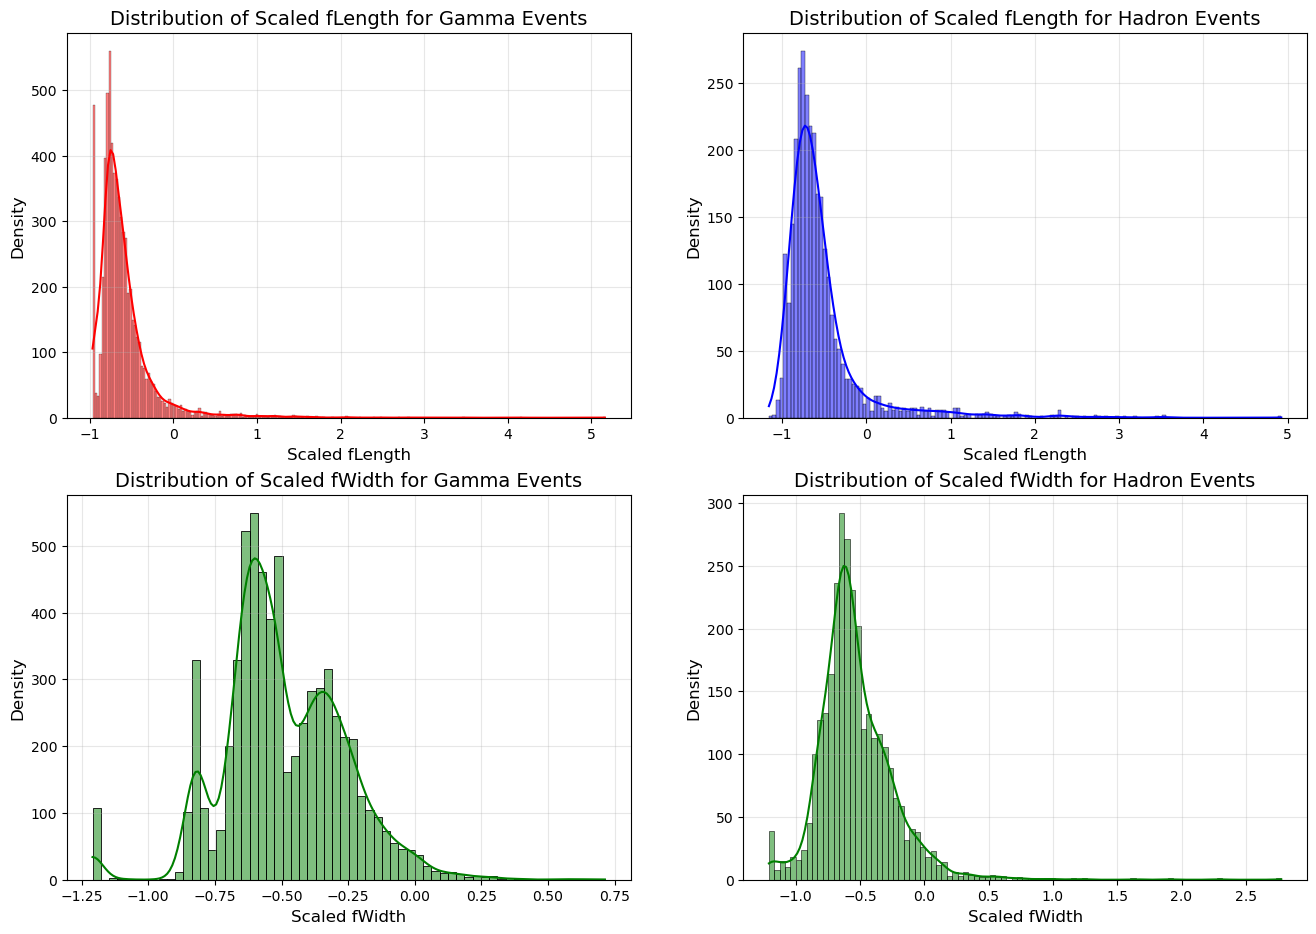

In [20]:
### LOW LIGHT  ############

fig, axes = plt.subplots(2, 2, figsize=(16, 11))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[0][0])
axes[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
axes[0][0].set_xlabel("Scaled fLength", fontsize=12)
axes[0][0].set_ylabel("Density", fontsize=12)
axes[0][0].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] <= median_fSize], kde=True, color='green', ax=axes[1][0])
axes[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
axes[1][0].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][0].set_ylabel("Density", fontsize=12)
axes[1][0].grid(True, alpha=0.3)

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] <= median_fSize], kde=True, color='blue', ax=axes[0][1])
axes[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
axes[0][1].set_xlabel("Scaled fLength", fontsize=12)
axes[0][1].set_ylabel("Density", fontsize=12)
axes[0][1].grid(True, alpha=0.3)

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] <= median_fSize], kde=True, color='green', ax=axes[1][1])
axes[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
axes[1][1].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][1].set_ylabel("Density", fontsize=12)
axes[1][1].grid(True, alpha=0.3)

<AxesSubplot: xlabel='scaled_fLength', ylabel='Count'>

<AxesSubplot: xlabel='scaled_fWidth', ylabel='Count'>

<AxesSubplot: xlabel='scaled_fLength', ylabel='Count'>

<AxesSubplot: xlabel='scaled_fWidth', ylabel='Count'>

<AxesSubplot: xlabel='scaled_fLength', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fLength for Gamma Events')

Text(0.5, 0, 'Scaled fLength')

Text(0, 0.5, 'Density')

<AxesSubplot: xlabel='scaled_fWidth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fWidth for Gamma Events')

Text(0.5, 0, 'Scaled fWidth')

Text(0, 0.5, 'Density')

<AxesSubplot: xlabel='scaled_fLength', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fLength for Hadron Events')

Text(0.5, 0, 'Scaled fLength')

Text(0, 0.5, 'Density')

<AxesSubplot: xlabel='scaled_fWidth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Scaled fWidth for Hadron Events')

Text(0.5, 0, 'Scaled fWidth')

Text(0, 0.5, 'Density')

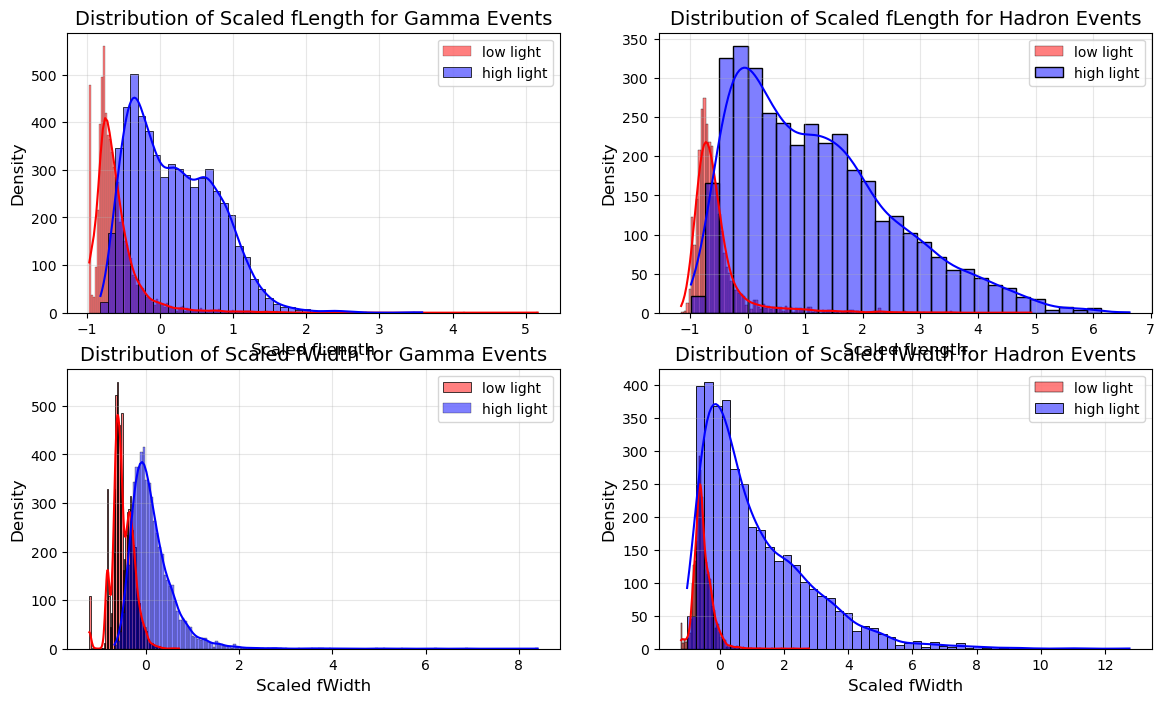

In [21]:
### LOW LIGHT  ############

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[0][0], label='low light')

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[1][0],label='low light')

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[0][1],label='low light')

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] <= median_fSize], kde=True, color='red', ax=axes[1][1],label='low light')

### HIGH LIGHT  ############

# Plot for scaled fLength, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fLength'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[0][0],label='high light')
axes[0][0].set_title("Distribution of Scaled fLength for Gamma Events", fontsize=14)
axes[0][0].set_xlabel("Scaled fLength", fontsize=12)
axes[0][0].set_ylabel("Density", fontsize=12)
axes[0][0].grid(True, alpha=0.3)
axes[0][0].legend()

# Plot for scaled fWidth, cat=g
sns.histplot(data[data['category'] == 'g']['scaled_fWidth'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[1][0],label='high light')
axes[1][0].set_title("Distribution of Scaled fWidth for Gamma Events", fontsize=14)
axes[1][0].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][0].set_ylabel("Density", fontsize=12)
axes[1][0].grid(True, alpha=0.3)
axes[1][0].legend()

# Plot for scaled fLength, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fLength'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[0][1],label='high light')
axes[0][1].set_title("Distribution of Scaled fLength for Hadron Events", fontsize=14)
axes[0][1].set_xlabel("Scaled fLength", fontsize=12)
axes[0][1].set_ylabel("Density", fontsize=12)
axes[0][1].grid(True, alpha=0.3)
axes[0][1].legend()

# Plot for scaled fWidth, cat=h
sns.histplot(data[data['category'] == 'h']['scaled_fWidth'][data['fSize'] >= median_fSize], kde=True, color='blue', ax=axes[1][1],label='high light')
axes[1][1].set_title("Distribution of Scaled fWidth for Hadron Events", fontsize=14)
axes[1][1].set_xlabel("Scaled fWidth", fontsize=12)
axes[1][1].set_ylabel("Density", fontsize=12)
axes[1][1].grid(True, alpha=0.3)
axes[1][1].legend()

plt.show()

# punto 4 (Johnny)
Perform a Principal Component Analysis on that dataset for the signal and the background events

# punto 5 (LukeBroc)
Perform a multivariate analysis, without using the parameter fAlpha for the classification, with the technique you prefer and evaluate its performance (e.g. in terms of Area Under the (ROC) Curve).

# 5.1 PERCEPTRON

In [16]:
new_Y = []

# gammas are +1    hadrons are -1

for i in range(len(Y)):
    if (Y.iloc[i] == 'g'):
        new_Y.append(1)
    if(Y.iloc[i] == 'h'):
        new_Y.append(-1)
        
Y_df = pd.DataFrame({'category' : new_Y})
data_rescaled_and_indexed = pd.merge(X_rescaled, Y_df,left_index=True, right_index=True)

# data_rescaled_and_indexed contains all features rescaled with avg = 0 and std = 1, and gammas = 1 and hadrons = -1


## Some ML functions

In [17]:
# this function divides the dataset in input in parts_to_be_split parts. One of them is returned as test_set
# the other ones are the training_set. Indexes of the chosen data can be accessed (test_indexes, train_indexes)
# (for example in a K-fold)

def split_train_test_set(data,parts_to_be_split):
    indexes = np.arange(0,data.shape[0],1)
    rnd.shuffle(indexes)
    len_test_set = int(len(indexes) / parts_to_be_split)

    test_indexes = indexes[:len_test_set]
    train_indexes = indexes[len_test_set:]

    train_set = data.iloc[train_indexes]
    test_set = data.iloc[test_indexes]
    
    return train_set, test_set

# this function takes col category and returns as Y (target), the other columns are X (labels)
def split_X_Y(data):
    Y = data['category']
    X = data.drop('category',axis=1)

    return X,Y

Getting the right sets

In [18]:
# divide dataset in 5 parts, taking 1 as test set ( 20 % )
# remove alpha



parts_to_be_split = 5 
train_set, test_set = split_train_test_set( data_rescaled_and_indexed , parts_to_be_split )
train_alpha = train_set['fAlpha']
train_set = train_set.drop('fAlpha',axis=1)
test_alpha = test_set['fAlpha']
test_set = test_set.drop('fAlpha',axis=1)
X_train, Y_train = split_X_Y(train_set)
X_test, Y_test = split_X_Y(test_set)

print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))


(15216, 9) (15216,)
(3803, 9) (3803,)


coding the perceptron (using sklearn)

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification

## SETTING 0.2 as MAX VALUE FOR FALSE POSITIVE RATE WHEN COMPUTING ROC AREA

In [54]:
n_attempts = 10000
limit = 0.2 #####################
best_scores = []
best_f = []
best_t = []
best_score = 0

print('n_iter, score')
for i in range (n_attempts):
    state = abs(np.random.normal(size=1))
    state = int(state[0] * 1000000)
    perceptron = Perceptron(alpha=0.01,penalty='l2',max_iter=10000,tol=1e-5,random_state=state)
    
    fitted = perceptron.fit(X_train,Y_train)
    
    decision_values = perceptron.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(Y_test, decision_values)
    
    # here i filter data to compute roc curve area for fpr in range 0 -> 0.8
    fpr_filtered = fpr[fpr <= limit]
    tpr_filtered = tpr[:len(fpr_filtered)]
    
    auc_filtered = np.trapz(tpr_filtered, fpr_filtered)
    auc = roc_auc_score(Y_test, decision_values)
    
    # score is better if filtered is better, though saving all 
    if (auc_filtered > best_score):
        best_score = auc_filtered
        best_scores.append(auc)
        best_f.append(fpr)
        best_t.append(tpr)
        print(i, auc)
    
print("best AUC-ROC Score:")
print(best_scores[len(best_scores)-1])

n_iter, score
0 0.5318816499034946
1 0.7778953449463157
3 0.735694220827716
4 0.7590076792139897
14 0.7763256161314414
15 0.7761922543475943
16 0.7972809957033259
24 0.7991035057175835
29 0.8095072403324831
92 0.8194545139326692
375 0.8184409643754305
413 0.8116849776437154
514 0.8202110389610389
531 0.8278278153884949
621 0.8260938091035177
1486 0.81560914813342
1689 0.8250884431102878
2499 0.818774975024975
2643 0.8209727166037846
best AUC-ROC Score:
0.8209727166037846


plotting ROC curve

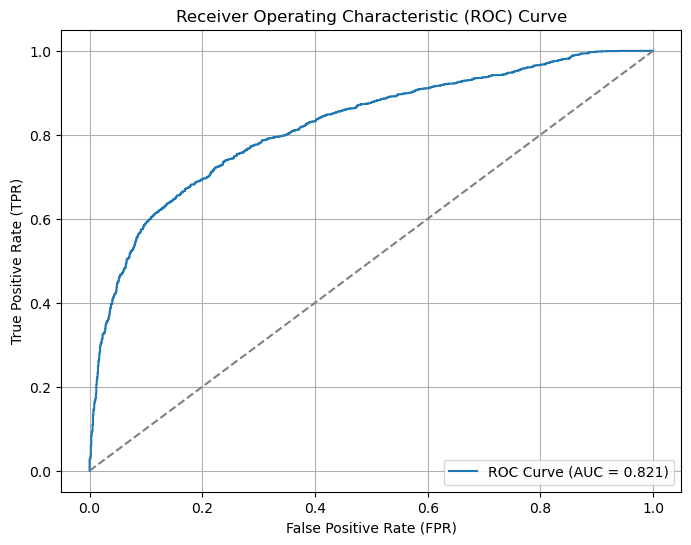

In [55]:
fig = plt.figure(figsize=(8, 6))

plt.plot(best_f[len(best_f)-1], best_t[len(best_f)-1], label=f'ROC Curve (AUC = {best_scores[len(best_f)-1]:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show();

# CUTTING ALPHA PARAM

In [26]:
X_train['fAlpha'] = train_alpha
X_test['fAlpha'] = test_alpha
print(X_train.columns[:])
print(X_train.shape[:])

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fDist', 'fAlpha'],
      dtype='object')
(15216, 10)


In [27]:
print(Y_train[:10])

1688     1
2663     1
15564   -1
3362     1
4052     1
17428   -1
5520     1
7579     1
13659   -1
5509     1
Name: category, dtype: int64


In [33]:
# this function finds cut value starting from possible max
def find_max_cut_value(X_train,Y_train,sel_label,min_hadrons):
    new_X = X_train[X_train.columns[sel_label]]
    new_data = np.vstack((new_X,Y_train))
    new_data_sorted = new_data[:, new_data[0].argsort()]
    
    #new_data_sorted_reversed = new_data_sorted[:, ::-1] #reverse!! STARTING FROM MAXX
    
    # setup vars, cut value is  set to max of the label, so that in worst scenario all points are true hadrons
    true_hadrons = 0
    max_cut_value = new_data_sorted[0,0]
    
    for i in range(new_data_sorted.shape[1]):
        if new_data_sorted[1,i] == -1:
            true_hadrons += 1
        if true_hadrons == min_hadrons:
            max_cut_value = new_data_sorted[0,i]
            
    return max_cut_value

# this functions returns the number of true positive and false positive points on test set
def find_tp_fp(X_test,Y_test,sel_label,cut_value):
    new_X = X_test[X_test.columns[sel_label]]
    new_data = np.vstack((new_X,Y_test))
    new_data_sorted = new_data[:, new_data[0].argsort()]
    new_data_sorted_reversed = new_data_sorted[:, ::-1] #reverse!! STARTING FROM MAXX
    fp = 0
    tp = 0
    
    for i in range(new_data_sorted_reversed.shape[1]):
        if new_data_sorted_reversed[0,i] < cut_value:
            if new_data_sorted_reversed[1,i] == 1:
                tp += 1
            if new_data_sorted_reversed[1,i] == -1:
                fp += 1
                
    return tp, fp # true positive, false positive

total gammas: 2464 tot hadrons: 1339 tot test points: 3803
best cut value is Alpha = -1.0415 with rate: 0.9592
#tp: 94   #fp: 4
rate of saved gammas: 0.0381
 
given threshold rate = 0.9, best cut is: -0.7506 with rate 0.9003
#tp: 1066 #fp: 118 rate of saved gammas: 0.4326


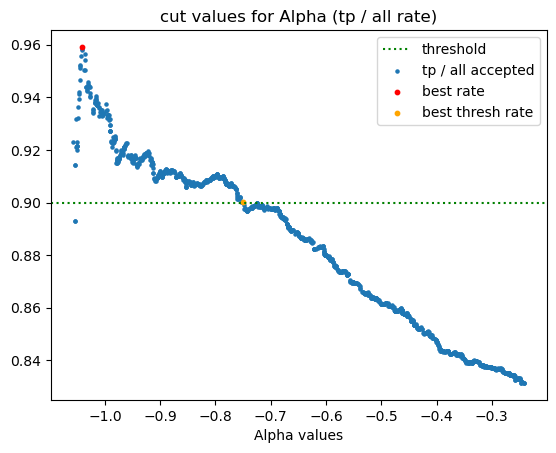

In [63]:
tot_hadrons = len(Y_test[Y_test == -1])
tot_gammas = len(Y_test[Y_test == 1])
tot_hadrons_train = len(Y_train[Y_train == -1])
sel_label = 9
# sel label = Alpha == 9

cut_values = []
rates = []
absolute_tp = []
absolute_fp = []

# setting minimum threshold as 0.90 (editable)
thresh = 0.90

#print('cut value    tp    fp     tp / all')
for i in range(1,tot_hadrons):
    cut_value = find_max_cut_value(X_train,Y_train,sel_label,i)
    
    # to check how the cut value behaves we get the results on test set
    tp, fp = find_tp_fp(X_test,Y_test,sel_label,cut_value)
    if (tp+fp == 0):
        tp = 1
    #print(cut_value,'  ',tp,'  ',fp,'  ',tp/(tp+fp))
    cut_values.append(cut_value)
    rates.append(tp/(tp+fp))
    absolute_tp.append(tp)
    absolute_fp.append(fp)
    
    if (tp/(tp+fp) > thresh):
        best_cut_thresh = cut_value
        rate_thresh = tp/(tp+fp)
        tp_thresh = tp
        fp_thresh = fp

index = np.argmax(rates)
best_rate = rates[index]
best_cut = cut_values[index]
best_tp = absolute_tp[index]
best_fp = absolute_fp[index]

print('total gammas:',tot_gammas,'tot hadrons:',tot_hadrons,'tot test points:',tot_gammas+tot_hadrons)
print('best cut value is Alpha =',round(best_cut,4),'with rate:',round(best_rate,4))
print('#tp:',best_tp,'  #fp:',best_fp)
print('rate of saved gammas:',round(best_tp / tot_gammas,4))
print(' ')
print('given threshold rate = 0.9, best cut is:',round(best_cut_thresh,4),'with rate',round(rate_thresh,4))
print('#tp:',tp_thresh,'#fp:',fp_thresh,'rate of saved gammas:',round(tp_thresh / tot_gammas,4))

plt.axhline(y=0.9, color='g', linestyle=':',label='threshold')  # Dotted green line
plt.scatter(cut_values,rates, s= 5,label='tp / all accepted')
plt.scatter(best_cut,best_rate,c='red',s=10,label='best rate')
plt.scatter(best_cut_thresh,rate_thresh,c='orange',s=10,label='best thresh rate')
plt.legend()
plt.title('cut values for Alpha (tp / all rate)')
plt.xlabel('Alpha values')
plt.show();


# Random Forest (LBroc)

I am going to implement a random forest for data classification, performing a control on the test set, not using the alpha parameter

import dataset, remove fAlpha and set category to 1 for gamma and -1 for hadron

In [ ]:
import random

file_name="magic_data.dat"
data = pd.DataFrame(pd.read_csv(file_name))
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']

data = data.drop('fAlpha',axis=1)
cat = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    if (data['category'].iloc[i] == 'g'):
        cat[i] = 1
    if (data['category'].iloc[i] == 'h'):
        cat[i] = -1
data['category'] = cat
print(np.shape(data))
parts_to_be_split = 5

train_set, test_set = split_train_test_set(data,parts_to_be_split)


X_train, Y_train = split_X_Y(train_set)
X_test, Y_test = split_X_Y(test_set)

 ## making decision tree
 Making up the class Tree

In [ ]:
class Tree:

    def __init__(self):
        self.idx = -1    # The index of the feature over which you split (no split: -1)
        self.thresh = 0  # The threshold value over which you split (<=: left, >: right)
        self.leaf = 0    # 1 if it is a leaf of class 1, -1 if it is a leaf of class -1, 0 if it is an internal node
        self.left = []   # Left subtree (empty if it is a leaf)
        self.right = []  # Right subtree (empty if it is a leaf)


    def entropy(left, right):
        H = 0
        tot_length = len(left) + len(right)
        left_prob = len(np.where(left > 0)[0]) / len(left)
        if (left_prob > 0):
            H -= len(left) * left_prob * np.log2(left_prob) / tot_length
        if (left_prob < 1):
            H -= len(left) * (1 - left_prob) * np.log2(1 - left_prob) / tot_length
        right_prob = len(np.where(right > 0)[0]) / len(right)
        if (right_prob > 0):
            H -= len(right) * right_prob * np.log2(right_prob) / tot_length
        if (right_prob < 1):
            H -= len(right) * (1 - right_prob) * np.log2(1 - right_prob) / tot_length
        return H

    def classify(self, x):
        # Classify the point x (easy for leaves, you have to go down the tree if the node is internal)
        if self.leaf == 0:
            if x[self.idx] > self.thresh:
                return self.right.classify(x)
            else:
                return self.left.classify(x)         
        else:
            return self.leaf

    def id3_training(self, X, Y, max_depth, printing):
        # Check if the node is a leaf (all nodes have the same label)
        if (np.max(Y) - np.min(Y) < 1e-3):
            self.leaf = np.max(Y)
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (all labels are the same over ' + str(len(Y)) + ' points)')
            return
        # If the maximum depth is 0, the node must be a leaf!
        if (max_depth < 1):
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (maximum depth reached, ' + str(len(Y)) + ' points)')
            if (len(np.where(Y > 0)) > len(Y) / 2):
                self.leaf = 1
            else:
                self.leaf = -1
            return
        # Find the best split: iterate over features
        best_idx = -1
        best_thresh = -1
        best_entropy = 1e9
        # Iterate over the features and threshold values
        for idx in range(X.shape[1]):
            values = X[:,idx]
            sorted_idx = np.argsort(values)
            values = np.unique(values) #values = np.unique(values[sorted_idx])
            for j in range(len(values)-1):
                thresh = (values[j]+values[j+1])/2
                left = np.where(X[:,idx] < thresh)
                right = np.where(X[:,idx] >= thresh)
                if len(left) == 0 or len(right) == 0:
                    print('error',thresh,idx)
                H = Tree.entropy(Y[left],Y[right])
                if H < best_entropy:
                    best_entropy = H
                    best_idx = idx
                    best_thresh = thresh
        
        
        if (best_idx == -1):
            # No valid features! The points are all identical
            self.leaf = np.sign(np.sum(Y))
            if (self.leaf == 0):
                self.leaf = 1
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (all inputs are the same over ' + str(len(Y)) + ' points)')
            return
        left_samples = np.where(X[:, best_idx] <= best_thresh)[0]
        right_samples = np.where(X[:, best_idx] > best_thresh)[0]
        if (printing):
            print('Remaining depth: ' + str(max_depth) + ', splitting ' + str(len(Y)) + ' elements into ' + str(len(left_samples)) + ' and ' + str(len(right_samples)) + ' over feature ' + str(best_idx))

        #Run the next recursive step of ID3 over the left and right subtrees       
        self.idx = best_idx
        self.thresh = best_thresh
        self.left = Tree()
        self.right = Tree()
        self.left.id3_training(X[left_samples,:],Y[left_samples],max_depth - 1,printing)
        self.right.id3_training(X[right_samples,:],Y[right_samples],max_depth-1,printing)


    def extra_training(self, X, Y, max_depth, printing):
        # Check if the node is a leaf (all nodes have the same label)
        if (np.max(Y) - np.min(Y) < 1e-3):
            self.leaf = np.max(Y)
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (all labels are the same over ' + str(len(Y)) + ' points)')
            return
        # If the maximum depth is 0, the node must be a leaf
        if (max_depth < 1):
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (maximum depth reached, ' + str(len(Y)) + ' points)')
            if (len(np.where(Y > 0)) > len(Y) / 2):
                self.leaf = 1
            else:
                self.leaf = -1
            return
        # Find the best split: iterate over features
        best_idx = -1
        best_thresh = -1
        best_entropy = 1e9
        # Iterate over the features (now the threshold value is random) 
        for idx in range(X.shape[1]):
            values = X[:,idx]
            sorted_idx = np.argsort(values)
            values = np.unique(values)
            
            for j in range(len(values)):
                thresh = rnd.uniform(1)
                thresh = (max(values) - min(values)) * thresh
                left = np.where(X[:,idx] < thresh)
                right = np.where(X[:,idx] >= thresh)
                if (len(left) == 0 or len(right) == 0):
                    print('error',thresh,idx)
                H = Tree.entropy(Y[left],Y[right])
                
                if H < best_entropy:
                    best_entropy = H
                    best_idx = idx
                    best_thresh = thresh
        
        if (best_idx == -1):
            # No valid features! The points are all identical
            self.leaf = np.sign(np.sum(Y))
            if (self.leaf == 0):
                self.leaf = 1
            if (printing):
                print('Remaining depth: ' + str(max_depth) + ', leaf node (all inputs are the same over ' + str(len(Y)) + ' points)')
            return
        left_samples = np.where(X[:, best_idx] <= best_thresh)[0]
        right_samples = np.where(X[:, best_idx] > best_thresh)[0]
        if (printing):
            print('Remaining depth: ' + str(max_depth) + ', splitting ' + str(len(Y)) + ' elements into ' + str(len(left_samples)) + ' and ' + str(len(right_samples)) + ' over feature ' + str(best_idx))
        
        # run the next recursive step of ID3 over the left and right subtrees
        self.idx = best_idx
        self.thresh = best_thresh
        self.left = Tree()
        self.right = Tree()
        self.left.extra_training(X[left_samples,:],Y[left_samples],max_depth-1,printing)
        self.right.extra_training(X[right_samples,:],Y[right_samples],max_depth-1,printing)

Now we use the tree class to learn a model

In [ ]:
X_train_np = np.array(X_train)
Y_train_np = np.array(Y_train)
X_test_np = np.array(X_test)
Y_test_np = np.array(Y_test)

In [ ]:
single_tree = Tree()
single_tree.id3_training(X_train_np, Y_train_np, 25, True)

train_loss = 0
for i in range(len(Y_train_np)):
    predicted = single_tree.classify(X_train_np[i, :])
    if (Y_train_np[i] != predicted):
        train_loss += 1 / len(Y_train_np)
print('Training loss: ' + str(train_loss))

test_loss = 0
for i in range(len(Y_test_np)):
    predicted = single_tree.classify(X_test_np[i, :])
    if (Y_test_np[i] != predicted):
        test_loss += 1 / len(Y_test_np)
print('Test loss: ' + str(test_loss))

Since the overfit of a single Tree is very high, we can implement a random forest to avoid that

In [ ]:
class Forest:

    def __init__(self, trees, n_features, n_samples, max_depth):
        self.forest = []
        self.features = n_features
        self.max_depth = max_depth
        self.samples = n_samples
        for i in range(trees):
            self.forest.append(Tree())

    def classify(self, x):
        # Classify the point through a majority vote
        vote = 0
        for tree in self.forest:
            vote += tree.classify(x)
        return np.sign(vote)
                

    def train(self, X, Y):
        for tree in self.forest:
            X_train, Y_train = self.bag(X, Y)
            tree.id3_training(X_train, Y_train, self.max_depth, False)
        
    def bag(self, X, Y):
        features = X.shape[1]
        points = X.shape[0]
        # Bagging: sample with replacement
        bagged = random.choices(range(points),k=self.samples)
        X_bagged = X[bagged,:]
        # remove features that are not part of the tree
        selected = random.sample(range(features), self.features)
        X_bagged_selected = X_bagged[:, selected]  # Select only the chosen features
    
        return X_bagged_selected, Y[bagged]

In [ ]:
forest = Forest(500,X_train_np.shape[1], X_train_np.shape[0], 25)
forest.train(X_train_np, Y_train_np)

test_loss = 0
for i in range(len(Y_test_np)):
    predicted = forest.classify(X_test_np[i, :])
    if (Y_test_np[i] * predicted <= 0):
        test_loss += 1 / len(Y_test_np)
print('Test loss: ' + str(test_loss))

## EXTRA
# CUT ATTEMPT by LBroc


The cut is going to be performed given a minimium number of hadrons to be kept as hadrons (not false gammas). Per each number of hadrons the parameters are going to be given a minimum cut value, to be optimize maximizing Q. The dataset is not going to be split, and per each parameter Q is going to be computed, so that applying them on test set we can have ROC points per each value of true_hadrons

split dataset functions

In [ ]:
# this function divides the dataset in input in parts_to_be_split parts. One of them is returned as test_set
# the other ones are the training_set. Indexes of the chosen data can be accessed (test_indexes, train_indexes)
# (for example in a K-fold)

def split_train_test_set(data,parts_to_be_split):
    indexes = np.arange(0,data.shape[0],1)
    rnd.shuffle(indexes)
    len_test_set = int(len(indexes) / parts_to_be_split)

    test_indexes = indexes[:len_test_set]
    train_indexes = indexes[len_test_set:]

    train_set = data.iloc[train_indexes]
    test_set = data.iloc[test_indexes]
    
    return train_set, test_set

1/5 of the total dataset is here picked as test set. This can be easily changed

In [ ]:
file_name="magic04.data"
data = pd.DataFrame(pd.read_csv(file_name))
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']


train_set, test_set = split_train_test_set(data,5)

print('shape of train_set:',np.shape(train_set))
print('shape of test set:',np.shape(test_set))

Functions for finding cut values

In [ ]:
# this function takes col category and returns as Y (target), the other columns are X (labels)
def split_X_Y(data):
    Y = data['category']
    X = data.drop('category',axis=1)

    return X,Y

In [ ]:
X_train, Y_train = split_X_Y(train_set)
X_test, Y_test = split_X_Y(test_set)

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(Y_train))
print(np.shape(Y_test))



Study the features and their CDF relative to hadron fraction

In [ ]:
def hadron_CDF(X_train,Y_train,sel_label):
    new_X = X_train[X_train.columns[sel_label]]
    new_data = np.vstack((new_X,Y_train))
    new_data_sorted = new_data[:, new_data[0].argsort()]
    # setup vars, cut value is  set to max of the label, so that in worst scenario all points are true hadrons
    hadrons_fraction = np.zeros(new_data_sorted.shape[1])
    index = np.zeros(new_data_sorted.shape[1])
    true_hadrons = 0
    tot_h = len(Y_train[Y_train == 'h'])
    
    for i in range(new_data_sorted.shape[1]):
    
        if new_data_sorted[1,i] == 'h':
            true_hadrons += 1
        index[i] = i
        hadrons_fraction[i] = true_hadrons / tot_h
            
    return index,hadrons_fraction

In [ ]:
for i in range(X_train.shape[1]):
    index, hadrons_fraction = hadron_CDF(X_train,Y_train,i)
    plt.scatter(index,hadrons_fraction,s=0.3)
    title = 'feature n '+str(i)
    plt.title(title)
    plt.xlabel('feature')
    plt.ylabel('hadron fraction')
    plt.show()

for features n 0-1-8 may be better to cut from high values

In [59]:
# this function finds the minimum cut value for given label to compute
def find_min_cut_value(X_train,Y_train,sel_label,min_hadrons):
    new_X = X_train[X_train.columns[sel_label]]
    new_data = np.vstack((new_X,Y_train))
    new_data_sorted = new_data[:, new_data[0].argsort()]
    # setup vars, cut value is  set to max of the label, so that in worst scenario all points are true hadrons
    true_hadrons = 0
    min_cut_value = new_data_sorted[0,new_data_sorted.shape[1]-1]
    
    for i in range(new_data_sorted.shape[1]):
        if new_data_sorted[1,i] == 'h':
            true_hadrons += 1
        if true_hadrons == min_hadrons:
            min_cut_value = new_data_sorted[0,i]
            
    return min_cut_value

# this function finds cut value starting from possible max
def find_max_cut_value(X_train,Y_train,sel_label,min_hadrons):
    new_X = X_train[X_train.columns[sel_label]]
    new_data = np.vstack((new_X,Y_train))
    new_data_sorted = new_data[:, new_data[0].argsort()]
    
    new_data_sorted_reversed = new_data_sorted[:, ::-1] #reverse!! STARTING FROM MAXX
    
    # setup vars, cut value is  set to max of the label, so that in worst scenario all points are true hadrons
    true_hadrons = 0
    max_cut_value = new_data_sorted_reversed[0,new_data_sorted.shape[1]-1]
    
    for i in range(new_data_sorted_reversed.shape[1]):
        if new_data_sorted_reversed[1,i] == 'h':
            true_hadrons += 1
        if true_hadrons == min_hadrons:
            max_cut_value = new_data_sorted_reversed[0,i]
            
    return max_cut_value


def compute_Q(new_X,Y_train,cut_value):
    tot_g = len(Y_train[Y_train == 'g'])
    tot_h = len(Y_train[Y_train == 'h'])
    n_accepted_g = 0
    n_accepted_h = 0
    
    for j in range(len(Y_train)):                
        if (new_X.iloc[j] < cut_value and Y_train.iloc[j] == 'g'):
            n_accepted_g += 1
        if (new_X.iloc[j] < cut_value and Y_train.iloc[j] == 'h'):
            n_accepted_h += 1
    #if(n_accepted_h == 0):
    
    #n_accepted_h = 0.01
    
    epsilon_g = n_accepted_g / tot_g
    epsilon_h = n_accepted_h / tot_h
    
    sigma = n_accepted_g / np.sqrt( 2 * n_accepted_h + n_accepted_g )
    
    return epsilon_g / np.sqrt(epsilon_h)
    #return sigma


def find_better_cut_value(X_train,Y_train,sel_label,min_cut_value):
    new_X = X_train[X_train.columns[sel_label]]
    max_cut_value = max(new_X)
    
    #iterations of repeating Q calculus, edit to improve accuracy (and decrease performance)
    N_iter = 10
    step = abs(max_cut_value - min_cut_value) / N_iter
    best_Q = compute_Q(new_X,Y_train,min_cut_value)
    best_cut = min_cut_value
    
    for i in range(N_iter):
        cut = min_cut_value + i * step
        Q = compute_Q(new_X,Y_train,cut)
        
        #threshold for Q is at least 1.2
        if( Q > best_Q ):
            best_Q = Q.copy()
            best_cut = cut
            
    return best_Q, best_cut


def find_min_ROC_coordinates(X_train,Y_train,X_test,Y_test,min_hadrons):
    X_ROC = 0
    Y_ROC = 0
    X_ROC_BETTER = 0
    Y_ROC_BETTER = 0
    
    min_cut_values = []
    better_cut_values = []
    
    for i in range(len(X_train.columns)):
        min_cut_value = find_max_cut_value(X_train,Y_train,i,min_hadrons)
        #min_cut_value = find_min_cut_value(X_train,Y_train,i,min_hadrons)
        #Q, better_cut_value = find_better_cut_value(X_train,Y_train,i,min_cut_value)
        #this line uses the find better cut value function
        
        min_cut_values.append(min_cut_value)
        #better_cut_values.append(better_cut_value)
        #print(i,'min_cut:',min_cut_value)
        #print(i,'better_cut:',better_cut_value)
        
    n_accepted_g = 0
    n_accepted_h = 0
    #n_accepted_gb = 0
    #n_accepted_hb = 0
    #print(min_cut_values)
    #print(min_cut_values)
    #print(better_cut_values)
    for j in range(len(Y_test)):
        acc = 1
        accb = 1
        for i in range(len(min_cut_values)):
            #if (X_test[X_test.columns[i]].iloc[j] > min_cut_values[i] and i == 0 or i == 1 or i == 8):
            #    acc = 0
            if (X_test[X_test.columns[i]].iloc[j] > min_cut_values[i]):
                acc = 0
            #if (X_test[X_test.columns[i]].iloc[j] < better_cut_values[i]):
            #    accb = 0
        #print(acc)  
        if (acc == 1 and Y_test.iloc[j] == 'g'):
            n_accepted_g += 1
        if (acc == 1 and Y_test.iloc[j] == 'h'):
            n_accepted_h += 1
            
        #if (accb == 1 and Y_test.iloc[j] == 'g'):
        #    n_accepted_gb += 1
        #if (accb == 1 and Y_test.iloc[j] == 'h'):
        #    n_accepted_hb += 1
            
    
    tot_g = len(Y_test[Y_test == 'g'])
    tot_h = len(Y_test[Y_test == 'h'])
    '''print(n_accepted_g,tot_g)
    print(n_accepted_h,tot_h)'''
    Y_ROC = n_accepted_g / tot_g
    X_ROC = n_accepted_h / tot_h
    #Y_ROC_BETTER = n_accepted_gb / tot_g
    #X_ROC_BETTER = n_accepted_hb / tot_h
    
    return X_ROC, Y_ROC, min_cut_values                  #, X_ROC_BETTER, Y_ROC_BETTER




Worst possible selection results

In [ ]:
tot_h = len(Y_test[Y_test == 'h'])

print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(X_test))
ROC_CURVE_X = []
ROC_CURVE_Y = []
BETTER_ROC_CURVE_X = []
BETTER_ROC_CURVE_Y = []
WS = []

for i in range(tot_h):
    
    #reduce points and improves performance
    
    X_ROC, Y_ROC, min_cut_values = find_min_ROC_coordinates(X_train,Y_train,X_test,Y_test,i)
    ROC_CURVE_X.append(X_ROC)
    ROC_CURVE_Y.append(Y_ROC)
    WS.append(min_cut_values)
        #BETTER_ROC_CURVE_X.append(XB_ROC)
        #BETTER_ROC_CURVE_Y.append(YB_ROC)

    #print(i,X_ROC,Y_ROC)
        #print(i,XB_ROC,YB_ROC,'\n')

In [ ]:
x=np.linspace(0,1,1000)
print(len(ROC_CURVE_X))

distances = np.zeros(len(WS))
for i in range(len(WS)):
    distances[i] = np.sqrt((ROC_CURVE_X[i])**2 + (1-ROC_CURVE_Y[i])**2)
    
best_index = np.argmin(distances)
best_w = WS[best_index]
print('best parameters are:')
print(best_w)

plt.scatter(ROC_CURVE_X,ROC_CURVE_Y,s=3,label='cutting "hard way" the parameters')
plt.scatter(x,x,s=0.3,color='red',alpha=0.75)
plt.legend()
plt.show()